### Scenario

#### CA Bay Area Real Estate Company

* Find homes for first time buyers
* identify homes that might be undervalued
* Avoid overpriced homes
* Affordable homes: lower-middle of home values in the area

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Obtain

Field and Description

* longitude(signed numeric-float): Longitude value for the block in California, USA
* latitude(numeric-float): I attitude value for the block in California, USA
* housing_median_age(numeric-int): Median age of the house in the block
* total_rooms(numeric-int): Count of the total number of rooms (excluding bedrooms) in all houses in the block
* population(numeric-int): Count of the total number of population in the block
* households(numeric-int): Count of the total number of households in the block
* median_income(numeric-float): Median of the total household income of all the houses in the block
* ocean_proximity(numeric-categorical): Type of the landscape of the block [Unique Values:'NEAR BAY','<1H OCEAN','INLAND','NEAR OCEAN', 'ISLAND']
* median_house_value (numeric-int):Median of the household prices of all the houses in the block

In [9]:
# Load data
df = pd.read_csv('csv/bay_area_homes.csv')

In [10]:
df.head()

longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
0 -122.250920  37.062858           32.459551        976.0            75.0   
1 -121.098571  38.272821            5.122858       1091.0           413.0   
2 -121.536012  37.628712            8.919807       4242.0           376.0   
3 -121.802683  38.017141           45.029155       4464.0           420.0   
4 -122.687963  38.815133           30.715024       4565.0           729.0   

   population  households  median_income ocean_proximity  median_house_value  
0      1543.0       824.0    2181.699850        NEAR BAY       294282.189776  
1      1192.0       798.0   52588.133821       <1H OCEAN       244187.664411  
2      2994.0       242.0   88487.653028       <1H OCEAN       199767.103661  
3      2682.0       251.0   58836.606765      NEAR OCEAN       378747.111564  
4      1218.0       877.0   65621.238304          ISLAND       362172.923332

### Scrub

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           5009 non-null   float64
 1   latitude            5009 non-null   float64
 2   housing_median_age  5009 non-null   float64
 3   total_rooms         5009 non-null   float64
 4   total_bedrooms      5009 non-null   float64
 5   population          5009 non-null   float64
 6   households          5009 non-null   float64
 7   median_income       5009 non-null   float64
 8   ocean_proximity     5009 non-null   object 
 9   median_house_value  5009 non-null   float64
dtypes: float64(9), object(1)
memory usage: 391.5+ KB


In [12]:
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           5009 non-null   float64
 1   latitude            5009 non-null   float64
 2   housing_median_age  5009 non-null   float64
 3   total_rooms         5009 non-null   float64
 4   total_bedrooms      5009 non-null   float64
 5   population          5009 non-null   float64
 6   households          5009 non-null   float64
 7   median_income       5009 non-null   float64
 8   ocean_proximity     5009 non-null   object 
 9   median_house_value  5009 non-null   float64
dtypes: float64(9), object(1)
memory usage: 391.5+ KB


In [13]:
df_clean.describe()

longitude     latitude  housing_median_age  total_rooms  \
count  5009.000000  5009.000000         5009.000000  5009.000000   
mean   -122.003606    37.761501           33.993353  2477.723697   
std       0.579995     0.439861           10.104498  1353.694019   
min    -122.999484    37.000509            1.248018   101.000000   
25%    -122.503898    37.379232           25.500000  1313.000000   
50%    -122.007031    37.756590           33.900000  2483.000000   
75%    -121.498635    38.141895           42.700000  3637.000000   
max    -121.000255    38.971301           51.500000  4899.000000   

       total_bedrooms   population   households  median_income  \
count     5009.000000  5009.000000  5009.000000    5009.000000   
mean       545.728489  1597.628868   544.133160  491474.659978   
std        261.508010   831.466029   261.363835  236659.893137   
min          9.000000    10.000000     1.000000    2181.699850   
25%        320.000000   885.000000   314.000000  288702.930000   
50%        542.000000  1578.000000   542.000000  488980.720000   
75%        772.000000  2280.000000   769.000000  696230.270000   
max       1001.000000  4965.000000   997.000000  899827.080000   

       median_house_value  
count        5.009000e+03  
mean         7.423560e+05  
std          2.686838e+05  
min          5.549138e+04  
25%          5.076420e+05  
50%          7.406510e+05  
75%          9.767070e+05  
max          1.199935e+06

In [14]:
df_clean.median_income *= 10_000
df_clean.describe()

longitude     latitude  housing_median_age  total_rooms  \
count  5009.000000  5009.000000         5009.000000  5009.000000   
mean   -122.003606    37.761501           33.993353  2477.723697   
std       0.579995     0.439861           10.104498  1353.694019   
min    -122.999484    37.000509            1.248018   101.000000   
25%    -122.503898    37.379232           25.500000  1313.000000   
50%    -122.007031    37.756590           33.900000  2483.000000   
75%    -121.498635    38.141895           42.700000  3637.000000   
max    -121.000255    38.971301           51.500000  4899.000000   

       total_bedrooms   population   households  median_income  \
count     5009.000000  5009.000000  5009.000000   5.009000e+03   
mean       545.728489  1597.628868   544.133160   4.914747e+09   
std        261.508010   831.466029   261.363835   2.366599e+09   
min          9.000000    10.000000     1.000000   2.181700e+07   
25%        320.000000   885.000000   314.000000   2.887029e+09   
50%        542.000000  1578.000000   542.000000   4.889807e+09   
75%        772.000000  2280.000000   769.000000   6.962303e+09   
max       1001.000000  4965.000000   997.000000   8.998271e+09   

       median_house_value  
count        5.009000e+03  
mean         7.423560e+05  
std          2.686838e+05  
min          5.549138e+04  
25%          5.076420e+05  
50%          7.406510e+05  
75%          9.767070e+05  
max          1.199935e+06

In [15]:
df_clean['avg_n_rooms'] = df_clean.total_rooms / df_clean.households
df_clean['avg_n_bedrooms'] = df_clean.total_bedrooms / df_clean.households
df_clean.describe()

longitude     latitude  housing_median_age  total_rooms  \
count  5009.000000  5009.000000         5009.000000  5009.000000   
mean   -122.003606    37.761501           33.993353  2477.723697   
std       0.579995     0.439861           10.104498  1353.694019   
min    -122.999484    37.000509            1.248018   101.000000   
25%    -122.503898    37.379232           25.500000  1313.000000   
50%    -122.007031    37.756590           33.900000  2483.000000   
75%    -121.498635    38.141895           42.700000  3637.000000   
max    -121.000255    38.971301           51.500000  4899.000000   

       total_bedrooms   population   households  median_income  \
count     5009.000000  5009.000000  5009.000000   5.009000e+03   
mean       545.728489  1597.628868   544.133160   4.914747e+09   
std        261.508010   831.466029   261.363835   2.366599e+09   
min          9.000000    10.000000     1.000000   2.181700e+07   
25%        320.000000   885.000000   314.000000   2.887029e+09   
50%        542.000000  1578.000000   542.000000   4.889807e+09   
75%        772.000000  2280.000000   769.000000   6.962303e+09   
max       1001.000000  4965.000000   997.000000   8.998271e+09   

       median_house_value  avg_n_rooms  avg_n_bedrooms  
count        5.009000e+03  5009.000000     5009.000000  
mean         7.423560e+05     7.128671        1.601480  
std          2.686838e+05    42.183770       11.338220  
min          5.549138e+04     0.116279        0.009890  
25%          5.076420e+05     2.463360        0.569296  
50%          7.406510e+05     4.568127        1.014104  
75%          9.767070e+05     7.883721        1.741551  
max          1.199935e+06  2949.000000      796.000000

In [16]:
df = df_clean

### Explore

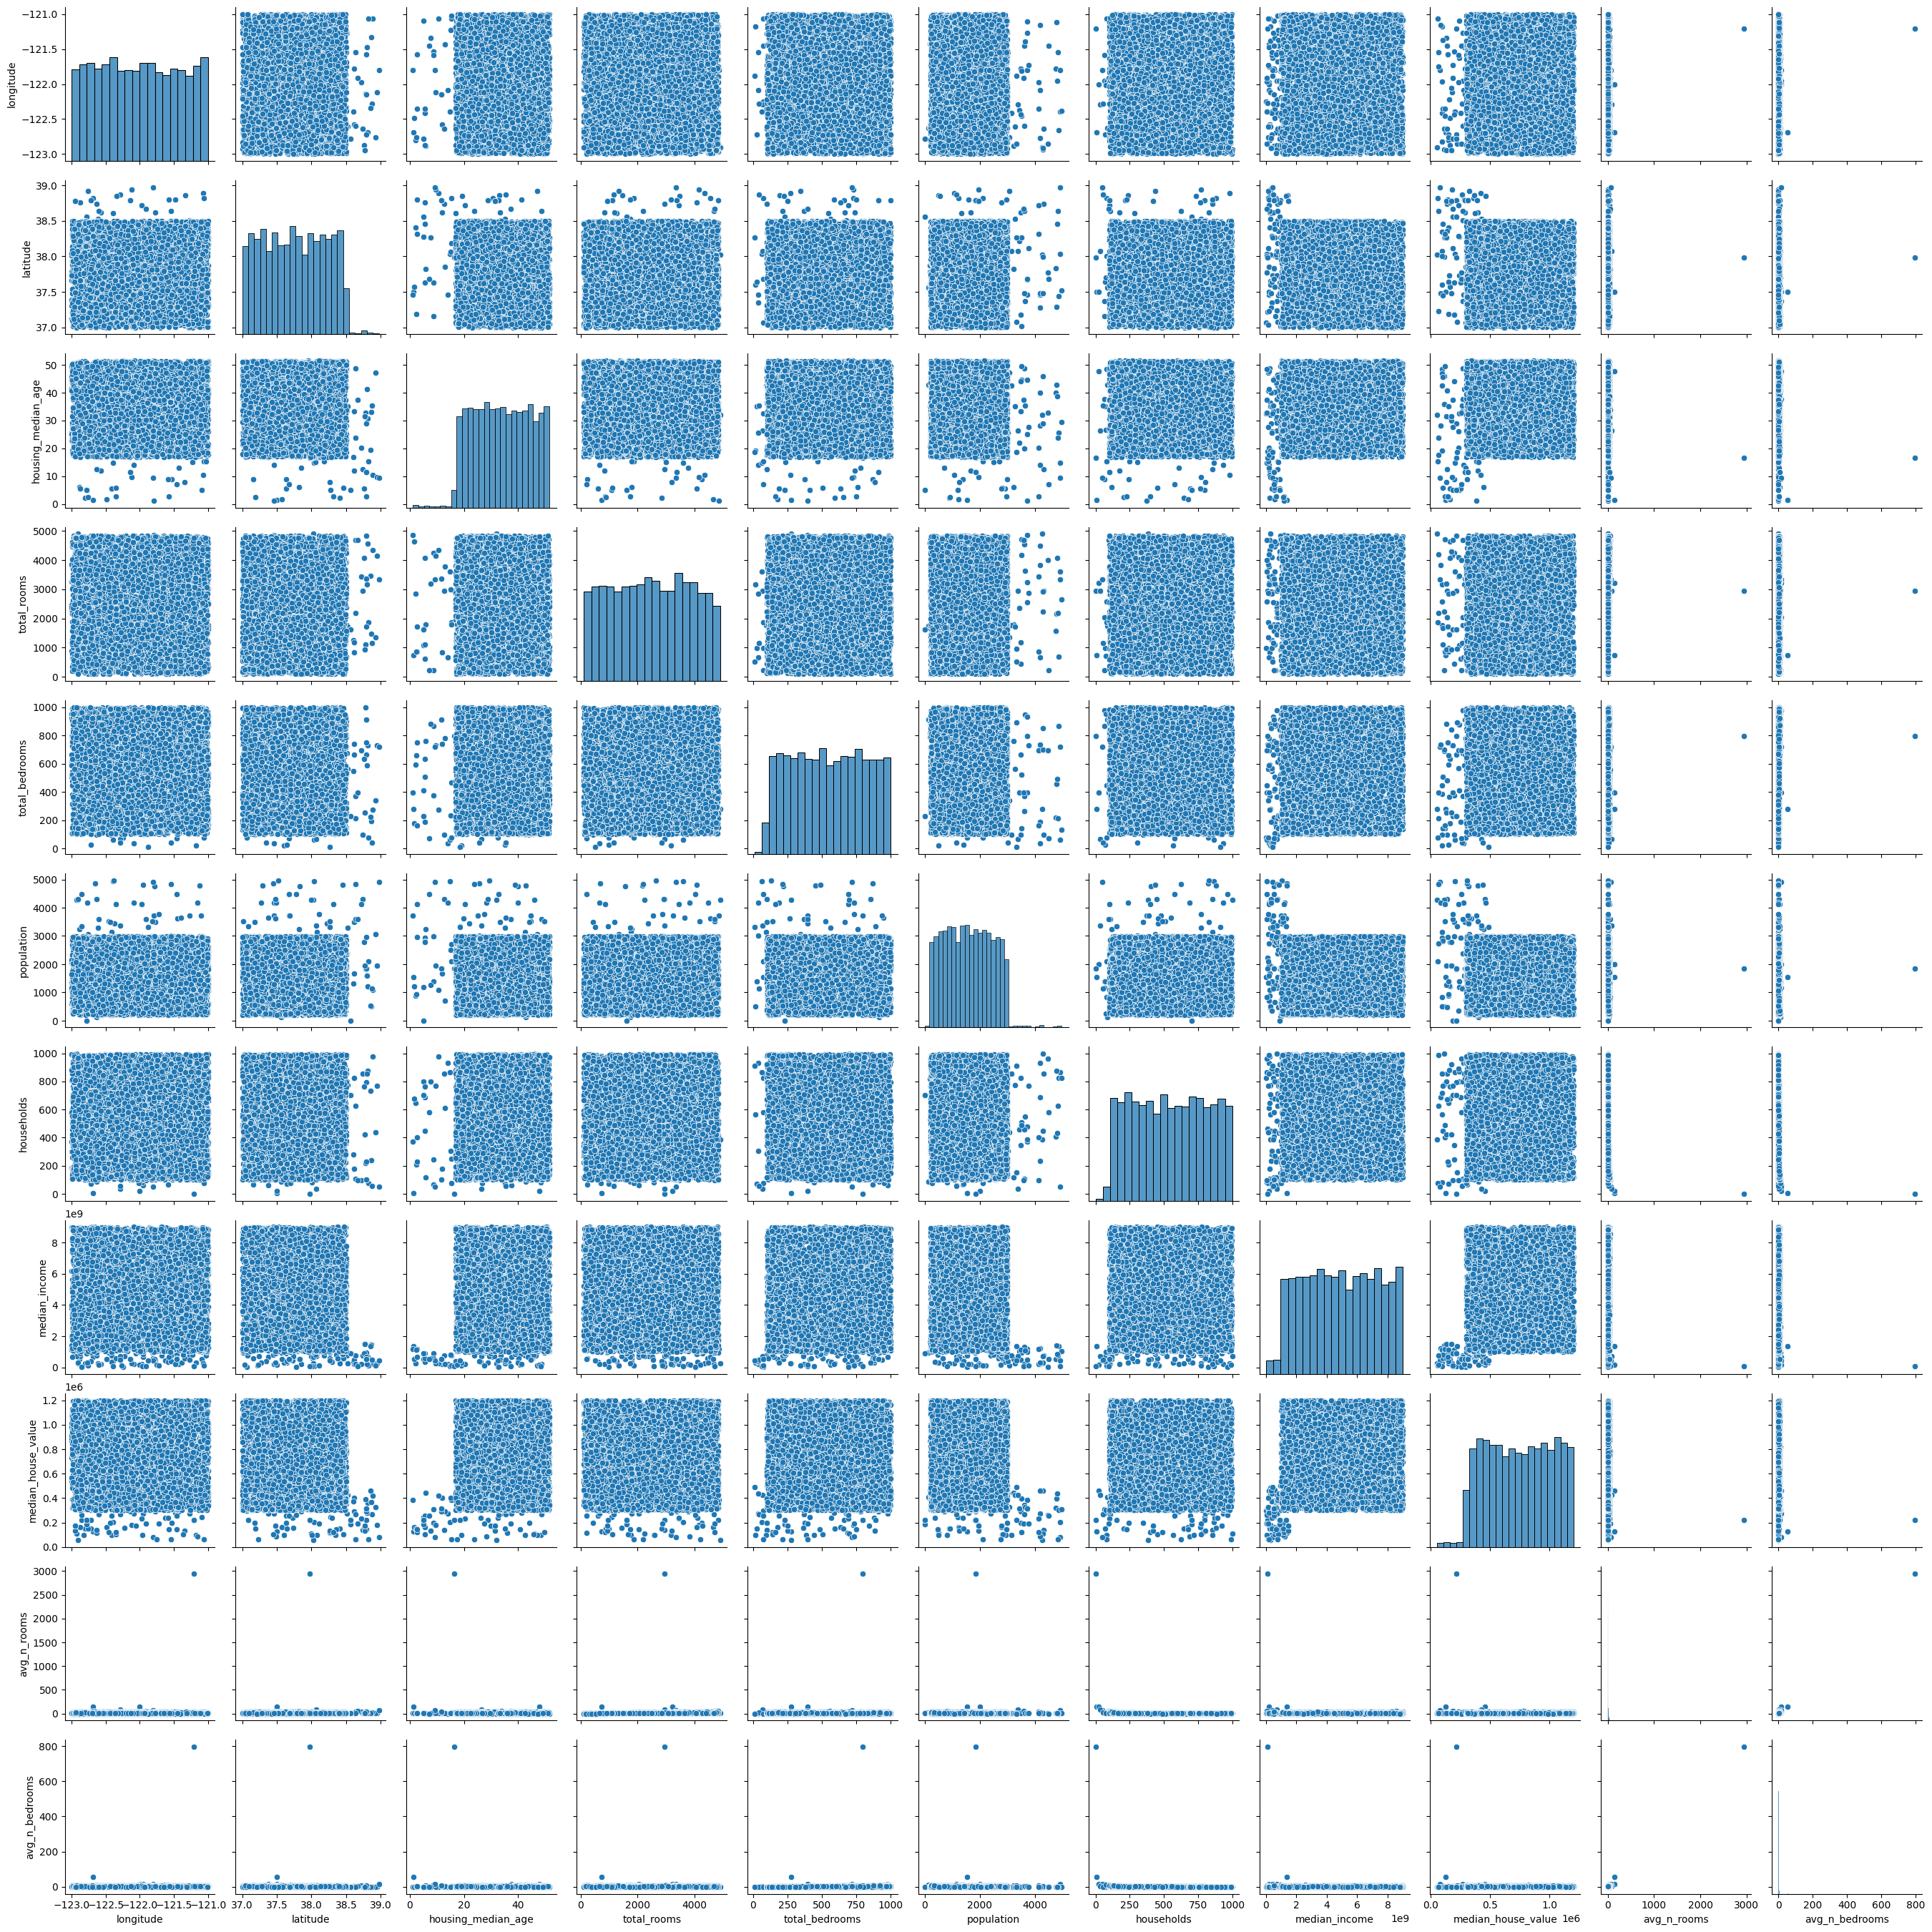

In [17]:
sns.pairplot(data=df)

<Axes: >

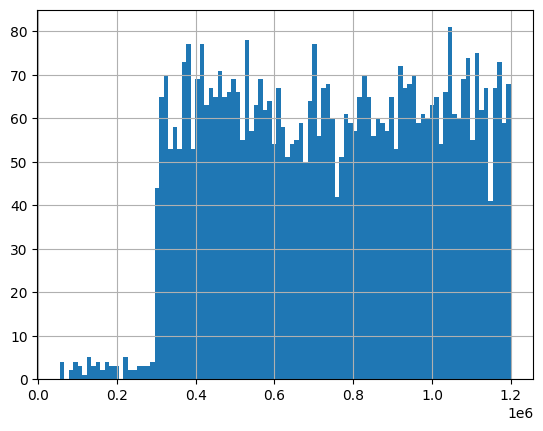

In [18]:
df.median_house_value.hist(bins=100)

<Axes: >

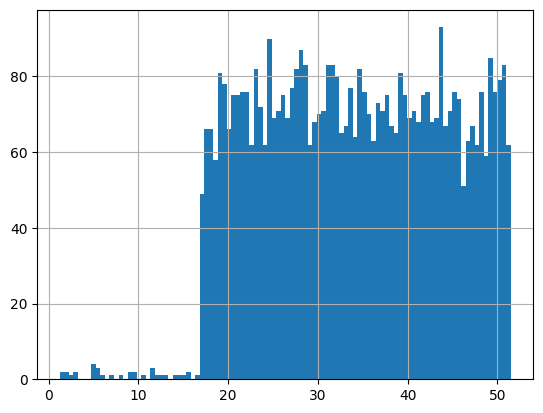

In [19]:
df.housing_median_age.hist(bins=100)

In [ ]:
# Adjust conditions based on data characteristics
age_condition = df.housing_median_age < 50  # Allowing for older houses
value_condition = df.median_house_value < 500_000  # Increasing max value
income_condition = df.median_income < 150_000  # Increasing max income

# Check individual condition counts
print("Count where housing_median_age < 50:", df[age_condition].shape[0])
print("Count where median_house_value < 500,000:", df[value_condition].shape[0])
print("Count where median_income < 150,000:", df[income_condition].shape[0])


In [ ]:
cap_mask = (
    (df.housing_median_age < 50) &
    (df.median_house_value < 500000) &
    (df.median_income < 150000)
)
df = df[cap_mask]
df.info()

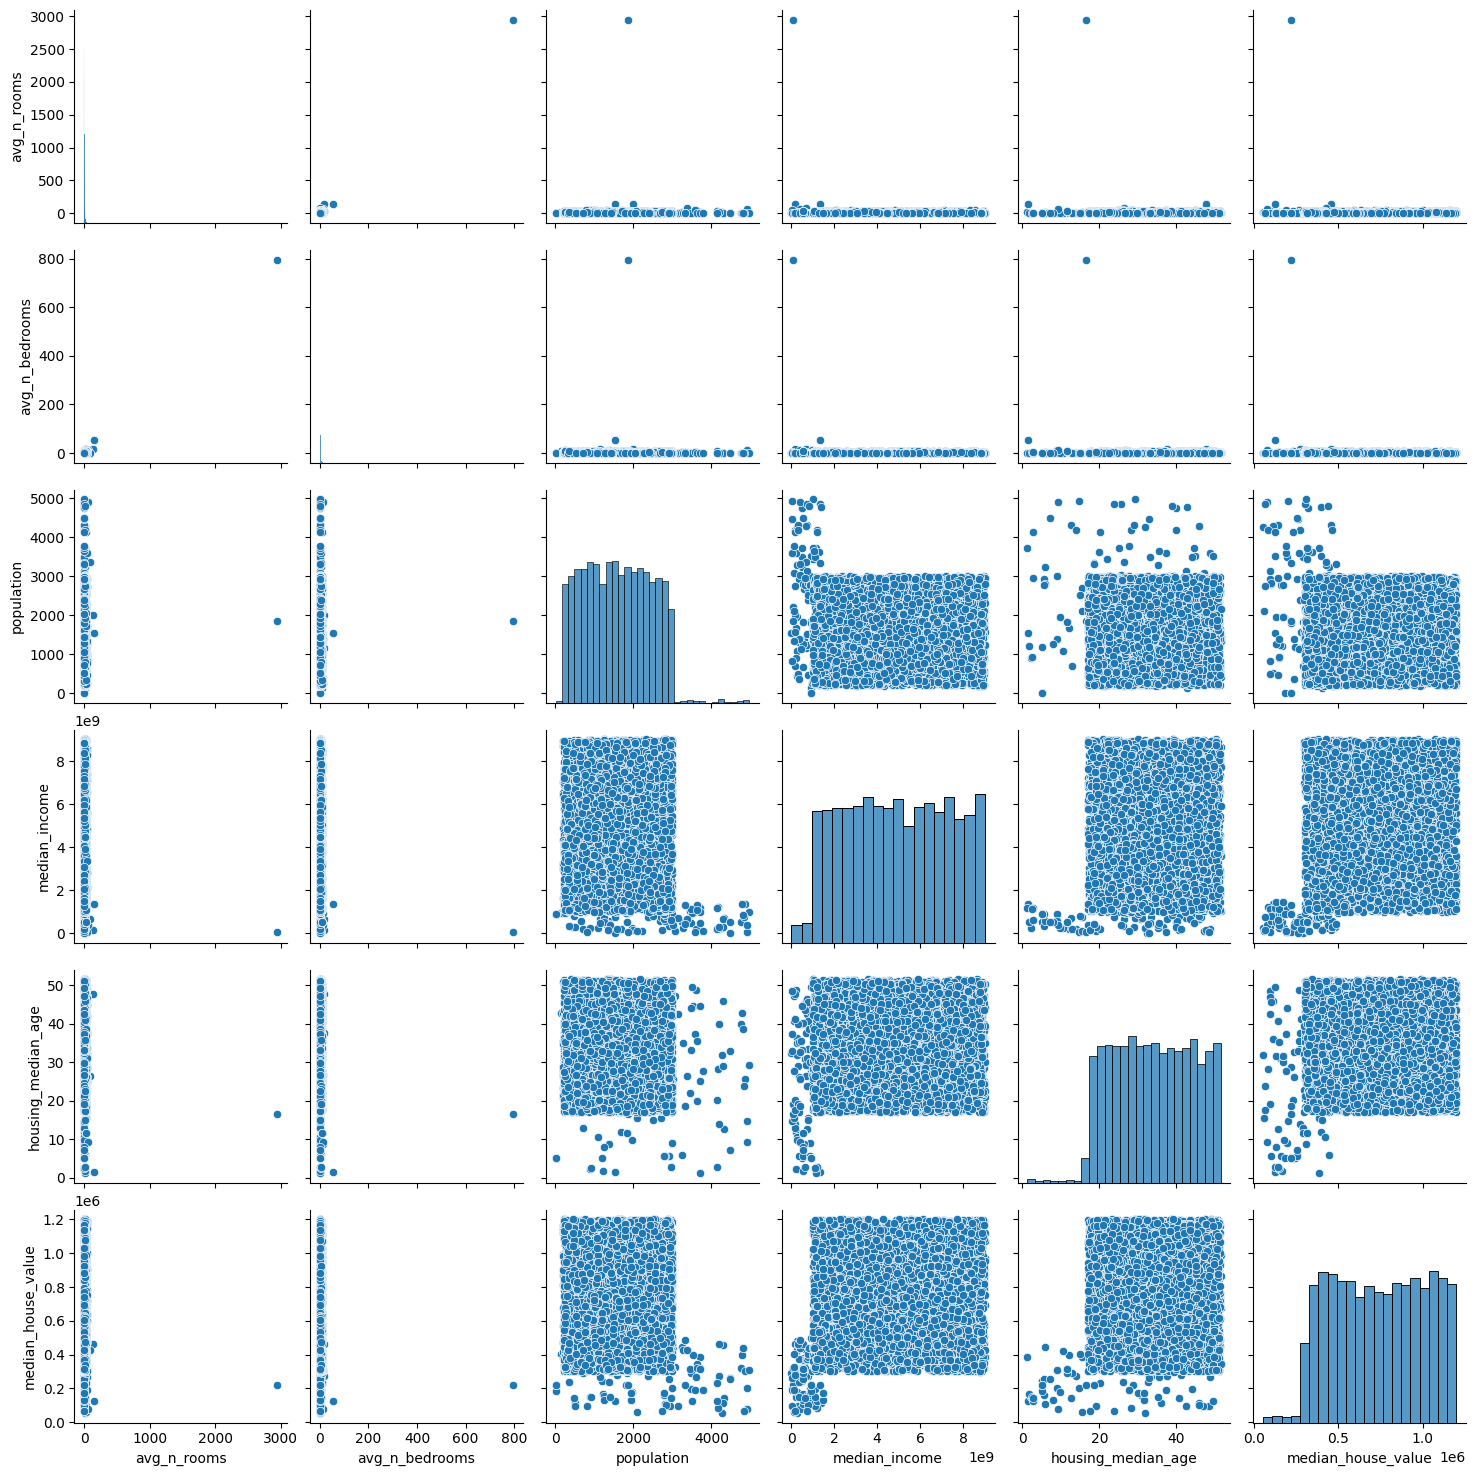

In [20]:
important_cols = [
    'avg_n_rooms',
    'avg_n_bedrooms',
    'population',
    'median_income',
    'housing_median_age',
    'median_house_value',
]

sns.pairplot(df[important_cols])

<Axes: ylabel='Frequency'>

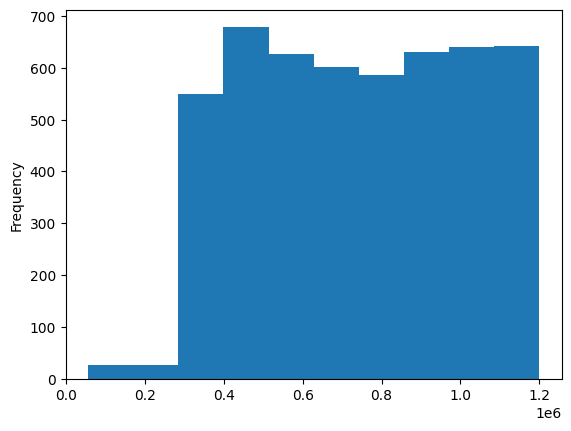

In [21]:
df['median_house_value'].plot.hist()

<Axes: >

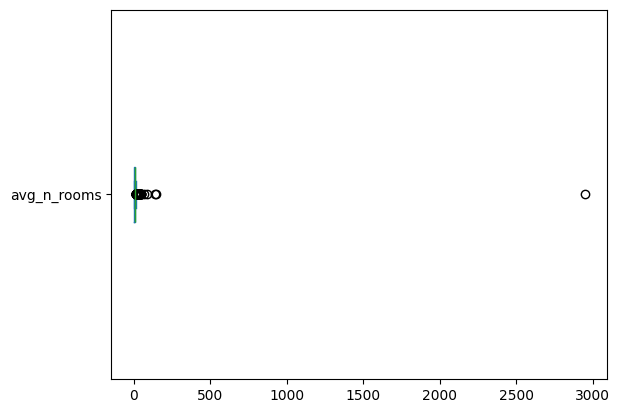

In [22]:
df.avg_n_rooms.plot.box(vert=False)

<Axes: ylabel='Frequency'>

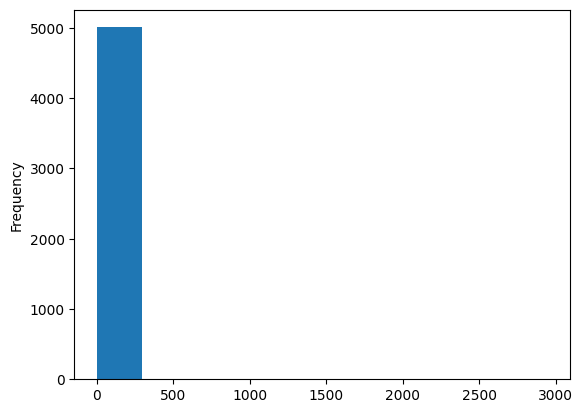

In [23]:
df.avg_n_rooms.plot.hist()

<Axes: ylabel='Frequency'>

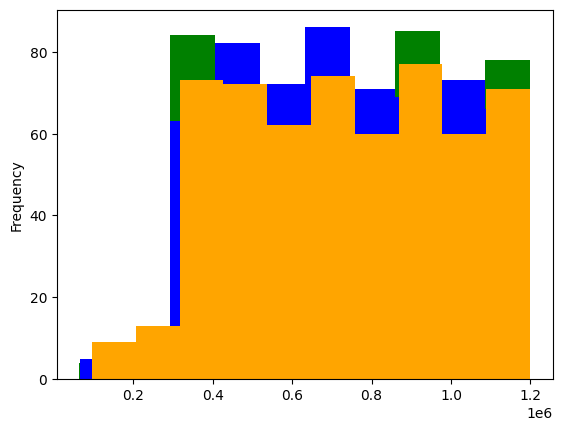

In [24]:
df[(df.avg_n_rooms > 4) & (df.avg_n_rooms < 5)]['median_house_value'].plot.hist(color='green')
df[(df.avg_n_rooms > 3) & (df.avg_n_rooms < 4)]['median_house_value'].plot.hist(color='blue')
df[(df.avg_n_rooms > 2) & (df.avg_n_rooms < 3)]['median_house_value'].plot.hist(color='orange')

### Modeling

In [ ]:
from pocket_data_scientist import (
ModelFromOurFriend,
CustomerSimilarity,
column_ratio,
ratio_name,
)

# Use model from our friend to see how far off predictions are for our subset
modeler = ModelFromOurFriend()
preds = modeler.model(df)

### iNterpret

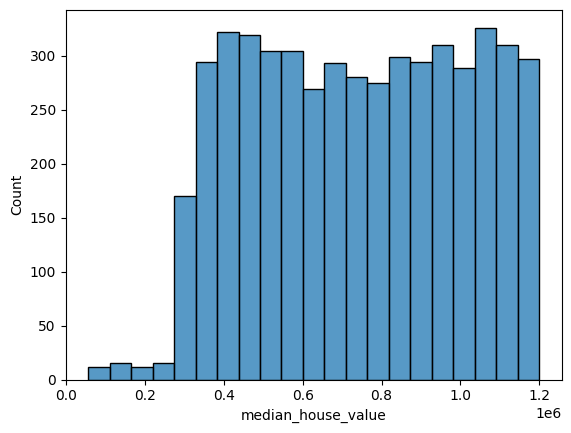

In [27]:
ax = sns.histplot(
    data=df,
    x='median_house_value',
    # bins=12,
)

Text(0.5, 0, 'Median House Value in District')

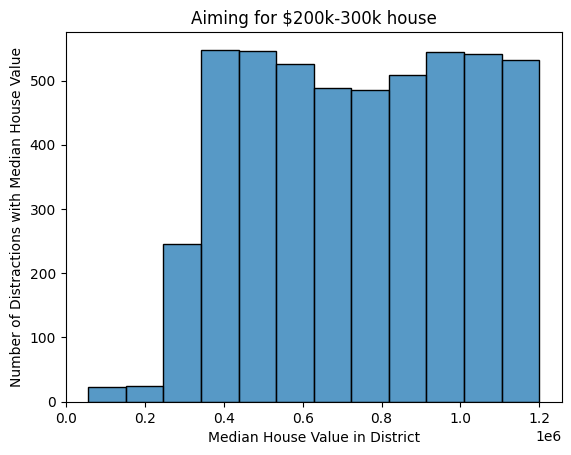

In [26]:
ax = sns.histplot(
    data=df,
    x='median_house_value',
    bins=12,
)

ax.set_title('Aiming for $200k-300k house')
ax.set_ylabel('Number of Distractions with Median House Value')
ax.set_xlabel('Median House Value in District')

<Axes: xlabel='avg_n_rooms', ylabel='median_house_value'>

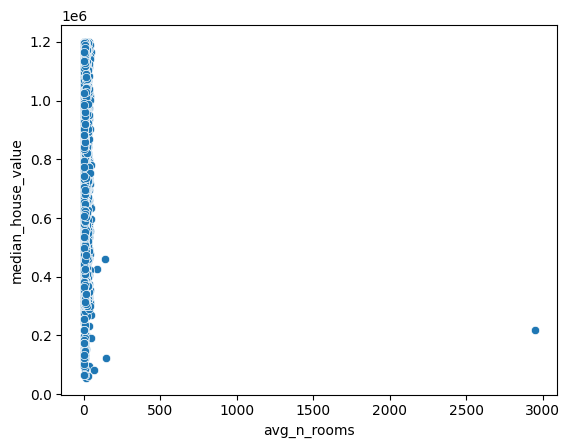

In [28]:
sns.scatterplot(data=df, x='avg_n_rooms', y='median_house_value')

Text(0.5, 28.999999999999986, 'Number of Rooms (average in district)')

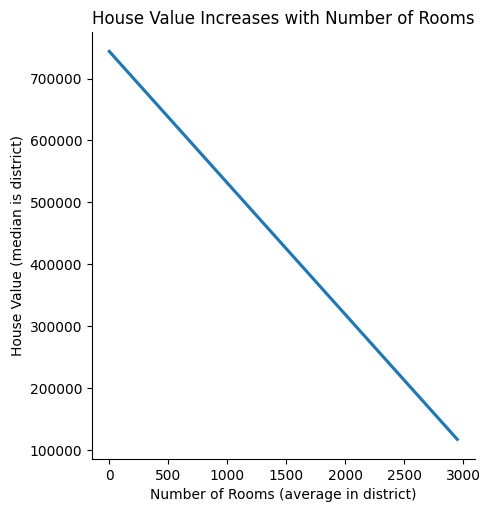

In [30]:
sns.lmplot(
    data=df,
    x='avg_n_rooms',
    y='median_house_value',
    scatter=False,
    ci=None,
)

plt.title('House Value Increases with Number of Rooms')
plt.ylabel('House Value (median is district)')
plt.xlabel('Number of Rooms (average in district)')

<Axes: ylabel='Frequency'>

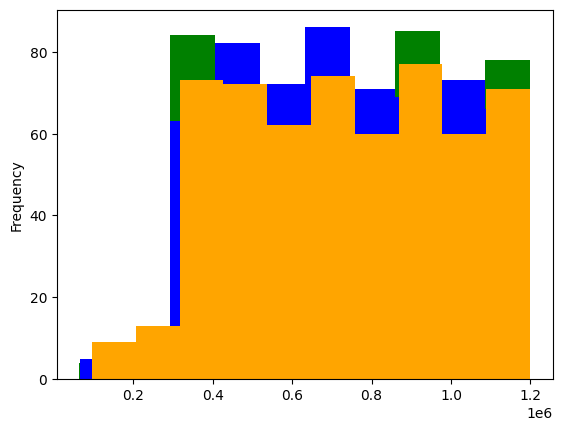

In [32]:
# From exploration
df[(df.avg_n_rooms < 5) & (df.avg_n_rooms > 4)]['median_house_value'].plot.hist(color='green')
df[(df.avg_n_rooms < 4) & (df.avg_n_rooms > 3)]['median_house_value'].plot.hist(color='blue')
df[(df.avg_n_rooms < 3) & (df.avg_n_rooms > 2)]['median_house_value'].plot.hist(color='orange')